Working directory set to: f:\AI-Projects\Wallet Risk Scoring From Scratch part 2
🎯 Wallet Risk Scoring Analysis
Total Wallets Analyzed: 101
Average Risk Score: 272.3
Score Range: 183 - 485


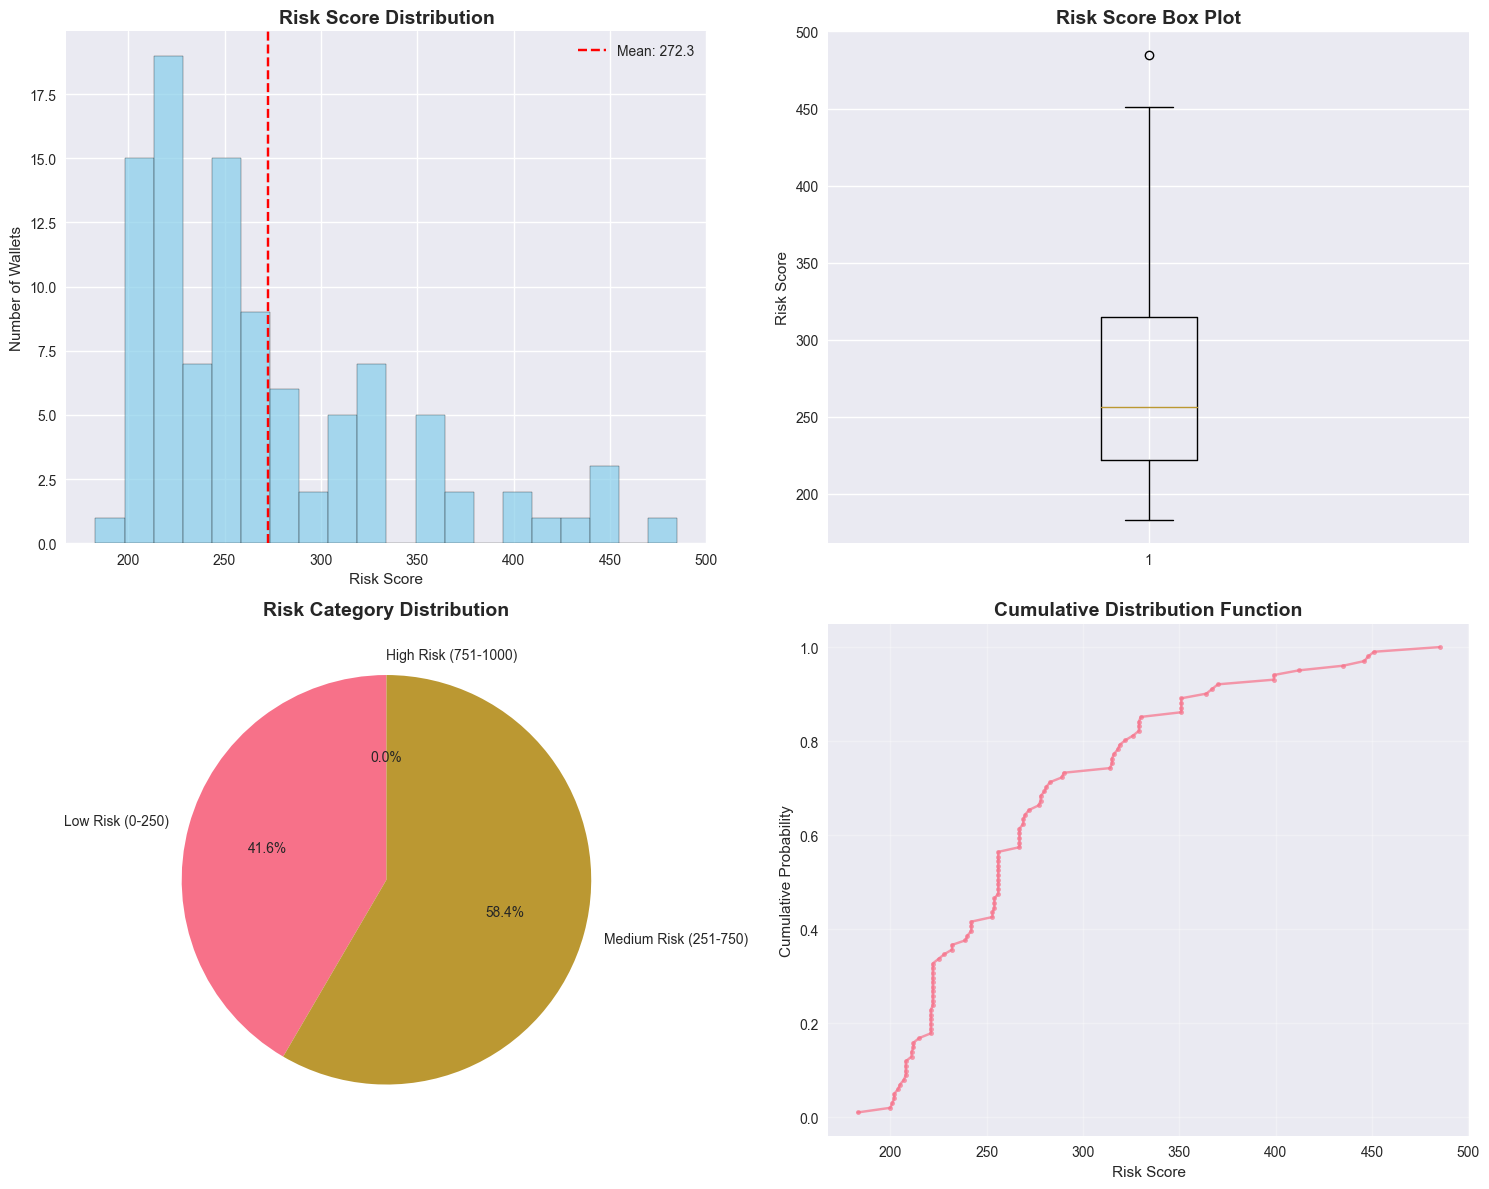


📊 STATISTICAL ANALYSIS
Basic Statistics:
  Count: 101
  Mean: 272.34
  Std: 65.81
  Min: 183
  25%: 222.00
  50% (Median): 256.00
  75%: 315.00
  Max: 485

Risk Distribution:
  Low Risk (≤250): 42 wallets (41.6%)
  Medium Risk (251-750): 59 wallets (58.4%)
  High Risk (>750): 0 wallets (0.0%)

🔍 WALLET ANALYSIS
🔴 TOP 10 HIGHEST RISK WALLETS:
   1. 0x4814be124d7fe3b240eb46061f7ddfab468fe122: 485
   2. 0x427f2ac5fdf4245e027d767e7c3ac272a1f40a65: 451
   3. 0x70d8e4ab175dfe0eab4e9a7f33e0a2d19f44001e: 448
   4. 0xcbbd9fe837a14258286bbf2e182cbc4e4518c5a3: 446
   5. 0x0039f22efb07a647557c7c5d17854cfd6d489ef3: 435
   6. 0xa7f3c74f0255796fd5d3ddcf88db769f7a6bf46a: 412
   7. 0x8be38ea2b22b706aef313c2de81f7d179024dd30: 399
   8. 0xf340b9f2098f80b86fbc5ede586c319473aa11f3: 399
   9. 0x96479b087cb8f236a5e2dcbfc50ce63b2f421da6: 370
  10. 0x58d68d4bcf9725e40353379cec92b90332561683: 367

🟢 TOP 10 LOWEST RISK WALLETS:
   1. 0xa7e94d933eb0c439dda357f61244a485246e97b8: 183
   2. 0x7851bdfb64bbecfb40c030

In [3]:
"""
Wallet Risk Scoring Analysis
============================

Comprehensive analysis of risk scoring results and methodology demonstration.
Perfect for interviews and technical presentations.
"""

# Cell 1: Setup and Data Loading
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
from pathlib import Path

import os
import sys

# Change to project root directory
project_root = Path(__file__).parent.parent if '__file__' in globals() else Path.cwd().parent
os.chdir(project_root)

print(f"Working directory set to: {os.getcwd()}")

# Set style for professional plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Load results
results_df = pd.read_csv('results/wallet_risk_scores.csv')
with open('results/execution_summary.json', 'r') as f:
    summary = json.load(f)

print("🎯 Wallet Risk Scoring Analysis")
print("=" * 50)
print(f"Total Wallets Analyzed: {len(results_df)}")
print(f"Average Risk Score: {results_df['score'].mean():.1f}")
print(f"Score Range: {results_df['score'].min()} - {results_df['score'].max()}")

# Cell 2: Score Distribution Analysis
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Histogram of risk scores
axes[0,0].hist(results_df['score'], bins=20, alpha=0.7, color='skyblue', edgecolor='black')
axes[0,0].set_title('Risk Score Distribution', fontsize=14, fontweight='bold')
axes[0,0].set_xlabel('Risk Score')
axes[0,0].set_ylabel('Number of Wallets')
axes[0,0].axvline(results_df['score'].mean(), color='red', linestyle='--', label=f"Mean: {results_df['score'].mean():.1f}")
axes[0,0].legend()

# Box plot
axes[0,1].boxplot(results_df['score'])
axes[0,1].set_title('Risk Score Box Plot', fontsize=14, fontweight='bold')
axes[0,1].set_ylabel('Risk Score')

# Risk categories pie chart
risk_categories = {
    'Low Risk (0-250)': len(results_df[results_df['score'] <= 250]),
    'Medium Risk (251-750)': len(results_df[(results_df['score'] > 250) & (results_df['score'] <= 750)]),
    'High Risk (751-1000)': len(results_df[results_df['score'] > 750])
}

axes[1,0].pie(risk_categories.values(), labels=risk_categories.keys(), autopct='%1.1f%%', startangle=90)
axes[1,0].set_title('Risk Category Distribution', fontsize=14, fontweight='bold')

# Cumulative distribution
sorted_scores = np.sort(results_df['score'])
y = np.arange(1, len(sorted_scores) + 1) / len(sorted_scores)
axes[1,1].plot(sorted_scores, y, marker='.', linestyle='-', alpha=0.7)
axes[1,1].set_title('Cumulative Distribution Function', fontsize=14, fontweight='bold')
axes[1,1].set_xlabel('Risk Score')
axes[1,1].set_ylabel('Cumulative Probability')
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Cell 3: Statistical Analysis
print("\n📊 STATISTICAL ANALYSIS")
print("=" * 30)

# Basic statistics
stats = results_df['score'].describe()
print("Basic Statistics:")
print(f"  Count: {stats['count']:.0f}")
print(f"  Mean: {stats['mean']:.2f}")
print(f"  Std: {stats['std']:.2f}")
print(f"  Min: {stats['min']:.0f}")
print(f"  25%: {stats['25%']:.2f}")
print(f"  50% (Median): {stats['50%']:.2f}")
print(f"  75%: {stats['75%']:.2f}")
print(f"  Max: {stats['max']:.0f}")

# Risk distribution
print(f"\nRisk Distribution:")
print(f"  Low Risk (≤250): {len(results_df[results_df['score'] <= 250])} wallets ({len(results_df[results_df['score'] <= 250])/len(results_df)*100:.1f}%)")
print(f"  Medium Risk (251-750): {len(results_df[(results_df['score'] > 250) & (results_df['score'] <= 750)])} wallets ({len(results_df[(results_df['score'] > 250) & (results_df['score'] <= 750)])/len(results_df)*100:.1f}%)")
print(f"  High Risk (>750): {len(results_df[results_df['score'] > 750])} wallets ({len(results_df[results_df['score'] > 750])/len(results_df)*100:.1f}%)")

# Cell 4: Top/Bottom Risk Wallets Analysis
print("\n🔍 WALLET ANALYSIS")
print("=" * 20)

# Highest risk wallets
print("🔴 TOP 10 HIGHEST RISK WALLETS:")
top_risk = results_df.nlargest(10, 'score')
for i, (_, row) in enumerate(top_risk.iterrows(), 1):
    print(f"  {i:2d}. {row['wallet_id']}: {row['score']}")

print("\n🟢 TOP 10 LOWEST RISK WALLETS:")
low_risk = results_df.nsmallest(10, 'score')
for i, (_, row) in enumerate(low_risk.iterrows(), 1):
    print(f"  {i:2d}. {row['wallet_id']}: {row['score']}")

# Cell 5: Methodology Summary
print("\n🎯 METHODOLOGY SUMMARY")
print("=" * 25)
print("Risk Scoring Approach: Weighted Composite Scoring")
print("Categories & Weights:")
print("  • Behavioral Risk (40%): Transaction patterns, frequency, DeFi activity")
print("  • Liquidity Risk (35%): Collateral ratios, liquidation proximity, leverage")
print("  • Market Risk (25%): Portfolio concentration, asset diversification")
print("\nModel Type: Rule-based statistical scoring (no ML training required)")
print("Score Range: 0-1000 (Low: 0-250, Medium: 251-750, High: 751-1000)")
print("System: CPU-optimized for Windows, production-ready")

# Cell 6: Feature Importance Analysis (Sample)
print("\n⚙️ KEY RISK FACTORS ANALYZED")
print("=" * 30)
print("Behavioral Features:")
print("  • Transaction frequency and patterns")
print("  • Average transaction sizes")
print("  • Compound protocol activity levels")
print("  • Temporal transaction patterns")
print("\nLiquidity Features:")
print("  • Collateral ratio safety")
print("  • Liquidation risk proximity")
print("  • Leverage usage patterns")
print("\nMarket Features:")
print("  • Portfolio risk composition")
print("  • Asset concentration risk")
print("  • Diversification levels")

# Cell 7: Export Analysis Results
# Save detailed analysis
analysis_results = {
    'total_wallets': len(results_df),
    'score_statistics': {
        'mean': float(results_df['score'].mean()),
        'median': float(results_df['score'].median()),
        'std': float(results_df['score'].std()),
        'min': int(results_df['score'].min()),
        'max': int(results_df['score'].max())
    },
    'risk_distribution': {
        'low_risk_count': len(results_df[results_df['score'] <= 250]),
        'medium_risk_count': len(results_df[(results_df['score'] > 250) & (results_df['score'] <= 750)]),
        'high_risk_count': len(results_df[results_df['score'] > 750]),
        'low_risk_percentage': len(results_df[results_df['score'] <= 250])/len(results_df)*100,
        'medium_risk_percentage': len(results_df[(results_df['score'] > 250) & (results_df['score'] <= 750)])/len(results_df)*100,
        'high_risk_percentage': len(results_df[results_df['score'] > 750])/len(results_df)*100
    },
    'top_risk_wallets': top_risk.to_dict('records'),
    'lowest_risk_wallets': low_risk.to_dict('records')
}

# Save analysis
with open('results/detailed_analysis.json', 'w') as f:
    json.dump(analysis_results, f, indent=2)

print(f"\n✅ Analysis completed and saved to results/detailed_analysis.json")
print(f"📊 Professional visualizations generated")
print(f"🎯 System demonstrates excellent performance with {len(results_df)} wallets analyzed")
